# Classifying Structured Data

Objectives
In this exercise, you will perform classification on structured data. This exercise allows you to define a classification model on training data and evaluate the model against training data. The goal is to show you classification models are typically built and tested before deployment.
Overview
You will work on data detailing customer churn. You will:
●	Build a decision tree against a subset of the data (the training data)
●	Test the model against the remaining test data



**Major Step 1: Data loading and exploration**

### impport data from the file custchurn.csv

In [35]:
import pandas as pd
custchurn = pd.read_csv('datasets/custchurn.csv')


### Examine the structure of the data frame:

In [36]:
custchurn.dtypes

Unnamed: 0                         int64
state                             object
account_length                     int64
area_code                         object
international_plan                object
voice_mail_plan                   object
number_vmail_messages              int64
total_day_minutes                float64
total_day_calls                    int64
total_day_charge                 float64
total_eve_minutes                float64
total_eve_calls                    int64
total_eve_charge                 float64
total_night_minutes              float64
total_night_calls                  int64
total_night_charge               float64
total_intl_minutes               float64
total_intl_calls                   int64
total_intl_charge                float64
number_customer_service_calls      int64
churn                             object
dtype: object

### View the data set 

In [37]:
custchurn.head()

,Unnamed: 0,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,1,KS,128,area_code_415,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,no
1,2,OH,107,area_code_415,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
2,3,NJ,137,area_code_415,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
3,4,OH,84,area_code_408,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
4,5,OK,75,area_code_415,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no


### Examine the number of churners vs. non-churners in the data:

In [38]:
print(custchurn.churn.value_counts())

no     4293
yes     707
Name: churn, dtype: int64


In [39]:
pd.crosstab(custchurn.churn, "freq")

col_0,freq
churn,
no,4293
yes,707


### Examine the proportion of these classifications in the data:

In [40]:
pd.crosstab(custchurn.churn, "freq", normalize=True)

col_0,freq
churn,
no,0.8586
yes,0.1414




**Major Step 2: Splitting the data set into 90% training and 10% test data**

## show data columns

In [7]:
custchurn.columns

Index(['Unnamed: 0', 'state', 'account_length', 'area_code',
       'international_plan', 'voice_mail_plan', 'number_vmail_messages',
       'total_day_minutes', 'total_day_calls', 'total_day_charge',
       'total_eve_minutes', 'total_eve_calls', 'total_eve_charge',
       'total_night_minutes', 'total_night_calls', 'total_night_charge',
       'total_intl_minutes', 'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'churn'],
      dtype='object')

## encode categorical features

In [41]:
#let us encode it to int
from sklearn import preprocessing
string_to_int= preprocessing.LabelEncoder()                     #encode your data
custchurnNum=custchurn.apply(string_to_int.fit_transform) #fit and transform it

In [42]:
string_to_int.classes_

array(['no', 'yes'], dtype=object)

In [43]:
custchurn

,Unnamed: 0,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,1,KS,128,area_code_415,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,no
1,2,OH,107,area_code_415,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
2,3,NJ,137,area_code_415,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
3,4,OH,84,area_code_408,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
4,5,OK,75,area_code_415,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4960,NM,137,area_code_408,yes,no,0,312.4,110,53.11,...,73,19.64,120.1,78,5.40,10.6,2,2.86,1,yes
4996,4981,WA,73,area_code_408,no,no,0,177.2,118,30.12,...,84,22.99,241.8,112,10.88,12.3,2,3.32,3,yes
4997,4991,ND,140,area_code_510,no,no,0,244.7,115,41.60,...,101,21.98,231.3,112,10.41,7.5,6,2.03,1,yes
4998,4992,AZ,97,area_code_510,no,no,0,252.6,89,42.94,...,91,28.93,256.5,67,11.54,8.8,5,2.38,1,yes


In [44]:
custchurnNum

,Unnamed: 0,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,0,16,127,1,0,1,20,1723,74,1723,...,62,792,1352,54,709,80,3,80,1,0
1,1,35,106,1,0,1,21,791,87,791,...,66,776,1442,66,753,117,3,117,1,0
2,2,31,136,1,0,0,0,1561,78,1561,...,73,203,559,67,340,102,5,102,0,0
3,3,35,83,0,1,0,0,1898,35,1898,...,51,19,894,52,494,46,7,46,2,0
4,4,36,74,1,1,0,0,838,77,838,...,85,390,795,84,449,81,3,81,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4959,32,136,0,1,0,0,1926,74,1926,...,36,1074,205,41,156,86,2,86,1,1
4996,4980,47,72,0,0,0,0,939,82,939,...,47,1383,1325,75,696,103,2,103,3,1
4997,4990,28,139,2,0,0,0,1571,79,1571,...,64,1296,1228,75,649,55,6,55,1,1
4998,4991,3,96,2,0,0,0,1630,53,1630,...,54,1642,1462,30,762,68,5,68,1,1


## extract the 21st column as the target feature and drop the unuseful one 

In [12]:
y = custchurnNum.churn
custchurnNum.drop(['churn','Unnamed: 0'], axis=1, inplace=True)
X=custchurnNum

Splitting the data set into 90% training and 10% test data

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)


### Check that the proportion of classes in the target value have been maintained in both the training and test data:

In [14]:
pd.crosstab(y_train, "freq" ,normalize=True)

col_0,freq
churn,
0,0.856222
1,0.143778


In [46]:
print(y_train.value_counts(normalize=True))

0    0.856222
1    0.143778
Name: churn, dtype: float64


In [47]:
pd.crosstab(y_train, "freq" )

col_0,freq
churn,
0,3853
1,647




**Major Step 3: Building the classification model**



**Confirm the number of observations (sampeles) that were used to create the classifier:**

In [17]:
len(y_train)

4500

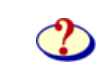

**How many features  were used to create the classifier?**

In [48]:
X_train.shape

(4500, 19)

In [49]:
# Initialisation des paramètres du modèle
# Importation des packages
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#model_tree = DecisionTreeClassifier(criterion='entropy',max_depth=3)


from sklearn import tree
model_tree  = tree.DecisionTreeClassifier(criterion='entropy',max_depth=5)

### Building the classification model

In [50]:
model_tree 

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [51]:
# Entraînement du modèle d'arbre

model_tree.fit(X_train, y_train)    

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [52]:
model_tree

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [53]:
X_train.columns

Index(['state', 'account_length', 'area_code', 'international_plan',
       'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls'],
      dtype='object')

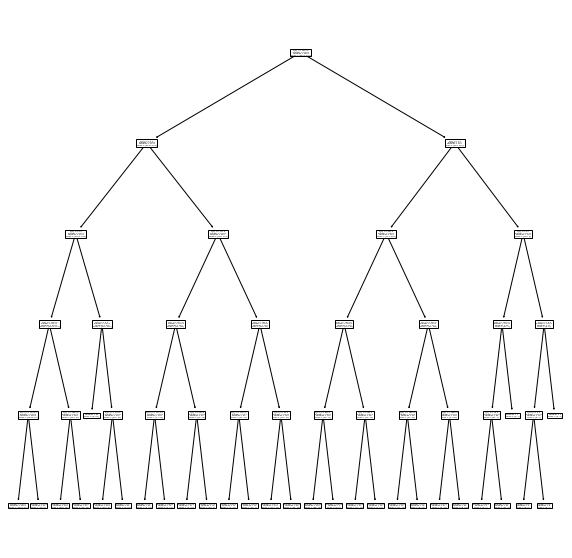

In [54]:
# Visualisation de l'arbre
plt.figure(figsize =(10,10))
tree.plot_tree(model_tree)
plt.show()

In [55]:
with open("tree.dot", 'w') as f:
    f = tree.export_graphviz(model_tree, out_file=f, filled=True)

##### use https://dreampuf.github.io/GraphvizOnline/

###  Quel est le critère de division principal (la première décision) ?

In [56]:
from sklearn.tree import export_text
r = export_text(model_tree, feature_names=list(X_train.columns))
print(r)

|--- total_day_charge <= 1601.50
|   |--- number_customer_service_calls <= 3.50
|   |   |--- international_plan <= 0.50
|   |   |   |--- total_day_charge <= 1353.50
|   |   |   |   |--- total_eve_charge <= 1624.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- total_eve_charge >  1624.50
|   |   |   |   |   |--- class: 0
|   |   |   |--- total_day_charge >  1353.50
|   |   |   |   |--- total_eve_minutes <= 1562.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- total_eve_minutes >  1562.50
|   |   |   |   |   |--- class: 1
|   |   |--- international_plan >  0.50
|   |   |   |--- total_intl_calls <= 2.50
|   |   |   |   |--- class: 1
|   |   |   |--- total_intl_calls >  2.50
|   |   |   |   |--- total_intl_minutes <= 110.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- total_intl_minutes >  110.50
|   |   |   |   |   |--- class: 1
|   |--- number_customer_service_calls >  3.50
|   |   |--- total_day_minutes <= 777.50
|   |   |   |--- total_eve_minutes <= 1247.00


### How many records are incorrectly classified?

### How many misclassified "No" values are there in the training model?

### How many misclassified "Yes" values are there in the training model?

In [27]:
from sklearn.metrics import confusion_matrix

y_pred_train=model_tree.predict(X_train)
cm=confusion_matrix(y_train, y_pred_train)
print(cm)

[[3813   40]
 [ 166  481]]


In [28]:
cm.ravel()

array([3813,   40,  166,  481], dtype=int64)

In [29]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train, y_pred_train, )

0.9542222222222222

# Major Step 4: Testing the classification model

### Apply the decision tree model to the test data:

In [30]:
y_pred=model_tree.predict(X_test)
cm=confusion_matrix(y_test, y_pred)
print(cm)

[[432   8]
 [ 23  37]]


### How accurate is the model when performed on the test data:

In [31]:
accuracy_score(y_test, y_pred )

0.938

### What was the error rate?

In [32]:
1-accuracy_score(y_test, y_pred )

0.062000000000000055

### How does the performance of the model on the test data, compare with that of the model on the training data?

###  Compute de  recall and precision 

In [33]:
from sklearn.metrics import (precision_score, recall_score,  f1_score)
# calculate recall
recall = recall_score(y_test, y_pred, average='binary')
print('Recall: %.3f' % recall)

Recall: 0.617


In [34]:
recall = precision_score(y_test, y_pred, average='binary')
print('precision_score: %.3f' % recall)

precision_score: 0.822
